In [1]:
import numpy as np
import pandas as pd
import matplotlib
import string
import nltk

#read the training data
df = pd.read_csv('../training/All2000_for_Patrice_16th_June-xlsx.csv', encoding = "UTF-8")

df.sample(4)

,Journal,Article #,Manuscript ID or DOI,dataset number,Full MeSH data type,Section,Subsection title,Page number,Column number,Data paragraph,Data Keyword,Data action word,Specialist equipment,Notes
11282,SCI REP,1675.0,https://doi.org/10.1038/s41598-018-37024-5,3.0,Tabular data:Fluorometry,Methods,Enzymatic assays and determination of kinetic ...,8.0,1.0,Kinetics of substrate hydrolysis was monitored...,Kinetics of substrate hydrolysis,was monitored,NaN,NaN
1802,PLOS ONE,287.0,https://doi.org/10.1371/journal.pone.0207102,2.0,Electrocardiograph,Methods,Anesthesia and animal preparation,12.0,1.0,"During\nanesthesia, heart rate, electrocardiog...",electrocardiogram,monitored,NaN,NaN
12,PLOS ONE,4.0,https://doi.org/10.1371/journal.pone.0201326,NaN,n/a: n/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No materials and methods section found
817,PLOS ONE,127.0,https://doi.org/10.1371/journal.pone.0204980,6.0,Tabular data,Methods,Open field test,5.0,1.0,Anxiety and exploratory behaviors were measure...,exploratory behaviors,were measured,NaN,NaN


In [2]:
# check and remove rows with empty text
nb1 = df.shape[0]
df['Data paragraph'].replace('', np.nan, inplace=True)

In [3]:
nb1 = df.shape[0]
df.dropna(subset=['Data paragraph'], inplace=True)
nb2 = df.shape[0]
print(nb1-nb2,"rows with empty paragraph text have been removed")
# df.reset_index(drop=True,inplace=True)

35 rows with empty paragraph text have been removed


In [4]:
# cleaning column types
df = df.astype({"Full MeSH data type": str})
df = df.astype({"Data Keyword": str})
df = df.astype({"Data action word": str})
df = df.astype({"Data paragraph": str})

def clean_fields(row):
    row["Data type"] = row["Full MeSH data type"].strip()
    row["Data Keyword"] = row["Data Keyword"].strip()
    row["Data action word"] = row["Data action word"].strip()
    return row

df = df.apply(clean_fields, axis=1)

datatypes = df['Data type'].value_counts()
print(len(datatypes), "distinct data types")

101 distinct data types


In [5]:
datatypes.head(10)

Tabular data                           5463
Tabular data:Research Subjects         2335
Image:Microscopy                        774
Tabular data:Assay                      764
Tabular data:Sampling Studies           472
Dataset:Existing dataset                394
Real-Time Polymerase Chain Reaction     356
Spectrometry:Spectrophotometry          299
Image:Electrophoresis                   284
Flow cytometry                          221
Name: Data type, dtype: int64

In [6]:
datatypes.describe()

count     101.000000
mean      136.405941
std       596.348072
min         1.000000
25%         2.000000
50%        11.000000
75%        49.000000
max      5463.000000
Name: Data type, dtype: float64

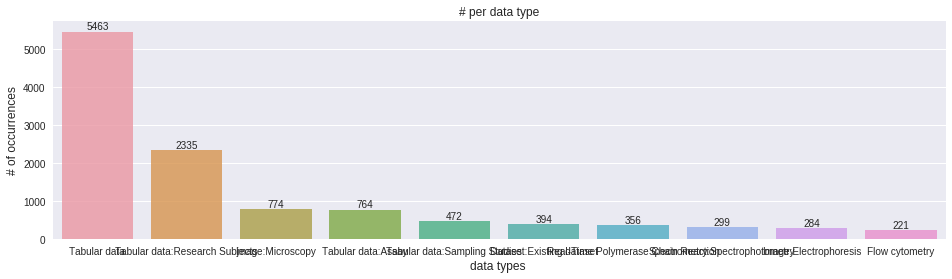

In [8]:
# just to visualize the basic distribution

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

x = datatypes.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data type")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data types ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

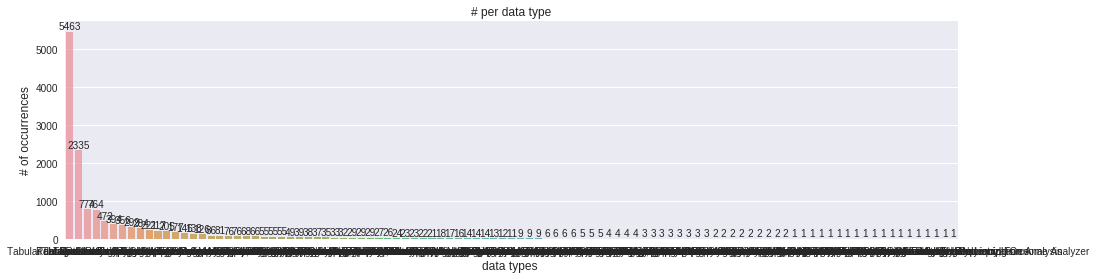

In [9]:
plt.close()

# view long tail
x = datatypes
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data type")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data types ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [11]:
sections = df['Section'].value_counts()
print(len(sections), "distinct section titles")

89 distinct section titles


In [12]:
sections.head(10)

Methods                    6521
Materials and methods      3388
Materials and Methods      1716
Material and methods        479
Material and Methods        317
Method                      187
Methods/design              112
Experimental Procedures      63
Patients and methods         61
Methodology                  57
Name: Section, dtype: int64

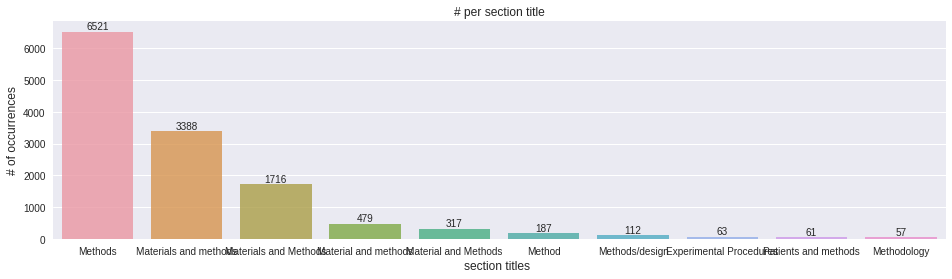

In [13]:
# just to visualize the basic distribution
x = sections.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per section title")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('section titles ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [14]:
print("Variations in the length of the texts")
lens = df['Data paragraph'].str.len()
print('mean:', lens.mean(), 'std:', lens.std(), 'max:', lens.max())

Variations in the length of the texts
mean: 175.93815567456534 std: 102.73905675650312 max: 1805.0


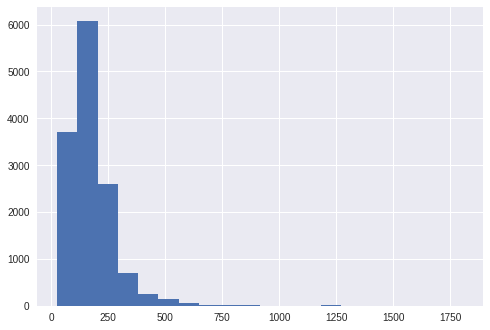

In [15]:
lens.hist(bins=20)

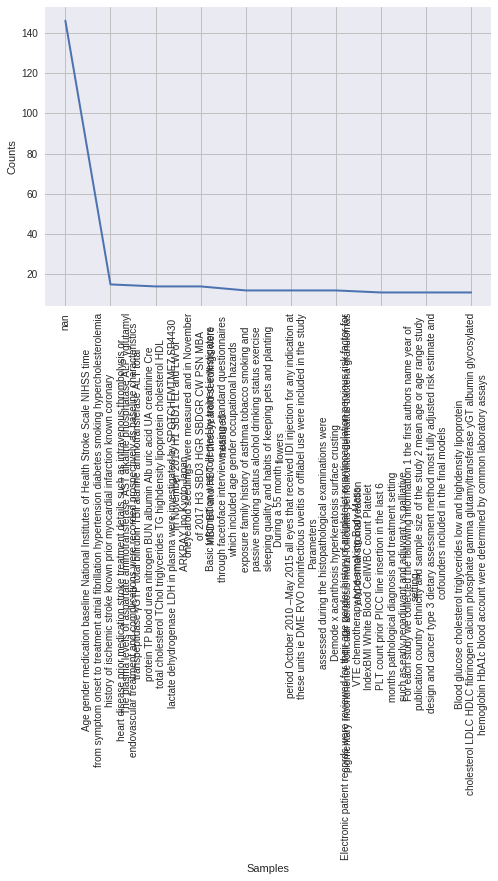

In [16]:
# text duplicates
all_texts = df['Data paragraph']
all_texts = [str(x) for x in all_texts]
sentences = [''.join(c for c in s if c not in string.punctuation) for s in all_texts]
frequency = nltk.FreqDist(sentences)
frequency.plot(10, cumulative = False)

In [17]:
duplicates =0
for key in frequency:
    if frequency[key] > 1:
        duplicates += 1
print(duplicates,"duplicated texts")

1304 duplicated texts


In [18]:
# can we match "Data Keyword" and "Data action word" in "Data paragraph"?
nb_mismatch_data_keyword = 0
nb_mismatch_data_action_word = 0
for i in df.index:
    if df.at[i,"Data paragraph"].find(df.at[i,"Data Keyword"]) == -1:
        nb_mismatch_data_keyword += 1
    if df.at[i,"Data paragraph"].find(df.at[i,"Data action word"]) == -1:
        nb_mismatch_data_action_word += 1
print(nb_mismatch_data_keyword, "mismatched Data keywords out of", df.shape[0])
print(nb_mismatch_data_action_word, "mismatched Data action word out of", df.shape[0])

AttributeError: 'float' object has no attribute 'find'